Our group is concerned with personal informatics, where we track a users step count over several periods. We are going to perform our initial data exploration to see if there any issues with the data and subsequently allows us to gain quick insights about the data.

In [ ]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Reading the data in, and in this case, we are examining User 2 
df = pd.read_csv('/content/User2.csv')

In [ ]:
#Checking if any of the data is null
df.isnull().sum()

Start            0
Finish           0
Steps (count)    0
dtype: int64

Checking if there are any Trues from df.isnull() - there is not, so good to go ahead with analysis. 

In [ ]:
#Quick visulisation
df

,Start,Finish,Steps (count)
0,29-Nov-2014 00:00,29-Nov-2014 01:00,502.666667
1,29-Nov-2014 01:00,29-Nov-2014 02:00,502.666667
2,29-Nov-2014 02:00,29-Nov-2014 03:00,502.666667
3,29-Nov-2014 03:00,29-Nov-2014 04:00,502.666667
4,29-Nov-2014 04:00,29-Nov-2014 05:00,502.666667
...,...,...,...
42272,25-Sep-2019 07:00,25-Sep-2019 08:00,0.000000
42273,25-Sep-2019 08:00,25-Sep-2019 09:00,0.000000
42274,25-Sep-2019 09:00,25-Sep-2019 10:00,31.000000
42275,25-Sep-2019 10:00,25-Sep-2019 11:00,418.000000


Quick visualisation about the df to see what is available to use.

In [ ]:
#Roudning it to 0 dp. 
df.round(0)

,Start,Finish,Steps (count)
0,29-Nov-2014 00:00,29-Nov-2014 01:00,503.0
1,29-Nov-2014 01:00,29-Nov-2014 02:00,503.0
2,29-Nov-2014 02:00,29-Nov-2014 03:00,503.0
3,29-Nov-2014 03:00,29-Nov-2014 04:00,503.0
4,29-Nov-2014 04:00,29-Nov-2014 05:00,503.0
...,...,...,...
42272,25-Sep-2019 07:00,25-Sep-2019 08:00,0.0
42273,25-Sep-2019 08:00,25-Sep-2019 09:00,0.0
42274,25-Sep-2019 09:00,25-Sep-2019 10:00,31.0
42275,25-Sep-2019 10:00,25-Sep-2019 11:00,418.0


The whole dataframe will be rounded (only applied to Steps as it is a float), this is as you cannot have half a step. 

(array([3.5364e+04, 4.1150e+03, 1.4210e+03, 5.4400e+02, 3.1300e+02,
        1.9400e+02, 1.8000e+02, 1.1600e+02, 2.5000e+01, 5.0000e+00]),
 array([   0.        ,  726.18168669, 1452.36337338, 2178.54506008,
        2904.72674677, 3630.90843346, 4357.09012015, 5083.27180684,
        5809.45349354, 6535.63518023, 7261.81686692]),
 <a list of 10 Patch objects>)

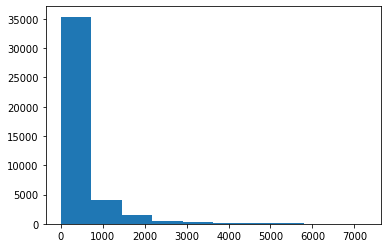

In [ ]:
#Having a quick look
plt.hist(df['Steps (count)'])

It seems like the steps count follows an exponential distribution, although it is difficult to tell as most of the step counts fall into the first bin. Would be beneficial if it is separated into more bins. 

(array([17568.,  4690.,  4572.,  3221.,  2079.,  1703.,  1249.,   903.,
          754.,   633.,   531.,   529.,   438.,   421.,   335.,   308.,
          230.,   181.,   166.,   156.,   138.,   118.,   109.,    76.,
          100.,    61.,    68.,    53.,    54.,    56.,    56.,    41.,
           46.,    33.,    38.,    36.,    26.,    36.,    23.,    28.,
           27.,    26.,    24.,    29.,    30.,    23.,    26.,    21.,
           18.]),
 array([   0,  100,  200,  300,  400,  500,  600,  700,  800,  900, 1000,
        1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100,
        2200, 2300, 2400, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200,
        3300, 3400, 3500, 3600, 3700, 3800, 3900, 4000, 4100, 4200, 4300,
        4400, 4500, 4600, 4700, 4800, 4900]),
 <a list of 49 Patch objects>)

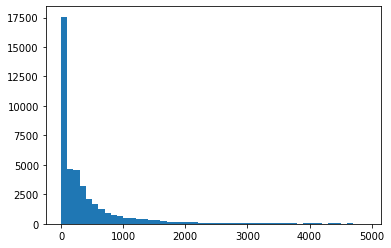

In [ ]:
#Just to show it better than the graph above. 
bin = np.arange(0,5000,100)
plt.hist(df['Steps (count)'],bins=bin)

It appears that there is an excessive number of steps under a 100. We may need to breakdown the steps underneath a 100 further but not at moment. 

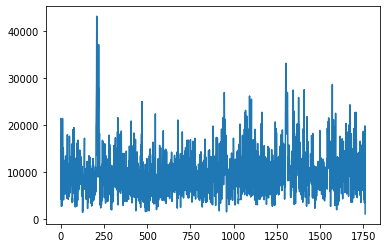

In [ ]:
plt.plot(df.set_index(df.index // 24).sum(level=0))  #Adding up every 24 hours to form a day.


Steps everday summed up. Does not tell us much. 

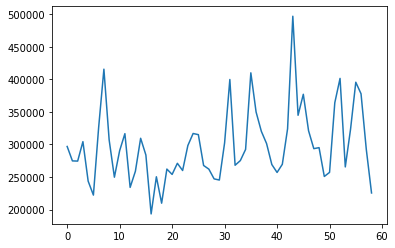

In [ ]:
plt.plot(df.set_index(df.index // 720).sum(level=0))

Based on months, trends are more visible- it seems like step counts over the months are quite sporadic/random



In [ ]:
df['Date'], df['Time starting'] = df['Start'].str.split(' ', 1).str
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['day_of_week'] = df['Date'].dt.day_name()  #adding a day of week
df['month'] = df['Date'].dt.month_name()   #adding month tag
df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  """Entry point for launching an IPython kernel.


,Start,Finish,Steps (count),Date,Time starting,day_of_week,month
0,29-Nov-2014 00:00,29-Nov-2014 01:00,502.666667,2014-11-29,00:00,Saturday,November
1,29-Nov-2014 01:00,29-Nov-2014 02:00,502.666667,2014-11-29,01:00,Saturday,November
2,29-Nov-2014 02:00,29-Nov-2014 03:00,502.666667,2014-11-29,02:00,Saturday,November
3,29-Nov-2014 03:00,29-Nov-2014 04:00,502.666667,2014-11-29,03:00,Saturday,November
4,29-Nov-2014 04:00,29-Nov-2014 05:00,502.666667,2014-11-29,04:00,Saturday,November
...,...,...,...,...,...,...,...
42272,25-Sep-2019 07:00,25-Sep-2019 08:00,0.000000,2019-09-25,07:00,Wednesday,September
42273,25-Sep-2019 08:00,25-Sep-2019 09:00,0.000000,2019-09-25,08:00,Wednesday,September
42274,25-Sep-2019 09:00,25-Sep-2019 10:00,31.000000,2019-09-25,09:00,Wednesday,September
42275,25-Sep-2019 10:00,25-Sep-2019 11:00,418.000000,2019-09-25,10:00,Wednesday,September


Firstly, I added up every 24 hours to form a data for consolidation purposes. In here, I have used the 'Start' column to assign a day of week and month to that particular record. This will be useful later on. 

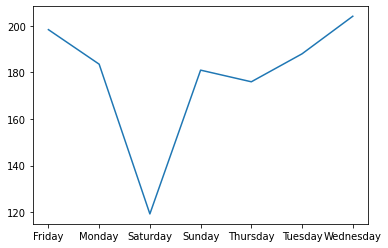

In [ ]:
#Grouping based on day of week
df.groupby('day_of_week')['Steps (count)'].median()
plt.plot(df.groupby('day_of_week')['Steps (count)'].median())

Using the median over all the years, it appears that there is a steep decline in terms of step count on Saturday. Otherwise, for every other weekday it tends to fluctuate between 180 and 200 step counts or so. 

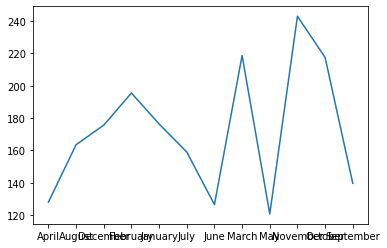

In [ ]:
#Grouping based on the month
df.groupby('month')['Steps (count)'].median()
plt.plot(df.groupby('month')['Steps (count)'].median())

Judging by the graph, it seems that data is largely sporadic. 